In [23]:
import tensorflow as tf 
import pandas as pandas
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
import numpy as np

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
len(X_train)

60000

In [26]:
len(X_test)

10000

In [27]:
X_train[0].shape

(28, 28)

In [28]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

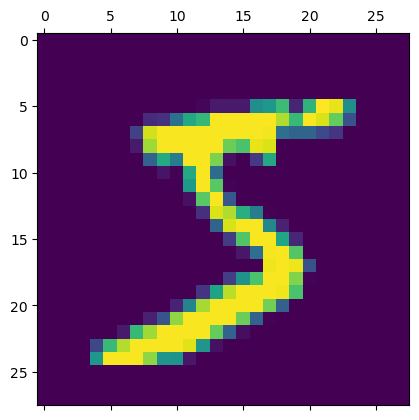

In [29]:
plt.matshow(X_train[0])

In [30]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [31]:
X_trian = X_train / 255
X_test = X_test / 255

In [32]:
# we have to flatten the data from 2D to 1D
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [33]:
X_train_flattened.shape

(60000, 784)

In [101]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),


])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5


c:\Users\AliRaza\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7687 - loss: 0.8366
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8937 - loss: 0.3741
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9065 - loss: 0.3254
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9102 - loss: 0.3037
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9144 - loss: 0.2883


In [102]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9036 - loss: 0.3528


[0.3063783049583435, 0.9215999841690063]

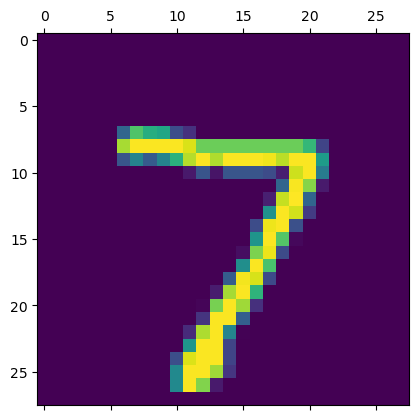

In [103]:
plt.matshow(X_test[0])

In [104]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [105]:
y_pred[0]

array([1.1630965e-01, 3.1164759e-03, 2.2202200e-01, 6.3026714e-01,
       1.7703257e-03, 8.1279397e-02, 1.6636815e-05, 9.9871027e-01,
       1.3097012e-02, 3.9060482e-01], dtype=float32)

In [106]:
np.argmax(y_pred[0])

7

In [107]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [108]:
y_pred_labels[:7]

[7, 2, 1, 0, 4, 1, 4]

In [109]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    4,    1,    0,   16,    3,    1,    2,    1],
       [   0, 1122,    2,    2,    0,    4,    4,    0,    1,    0],
       [   4,    2,  962,   20,   10,    4,    5,   10,   14,    1],
       [   2,    2,   14,  909,    1,   57,    0,   18,    6,    1],
       [   2,    6,   10,    1,  889,   10,   11,    2,    4,   47],
       [   7,    2,    3,   17,    3,  841,    6,    4,    6,    3],
       [  15,    3,   14,    1,   10,   38,  874,    1,    2,    0],
       [   4,   16,   28,    8,    4,    6,    0,  952,    0,   10],
       [   3,   18,   21,   31,    5,   54,    6,    9,  817,   10],
       [   6,    9,    5,   16,   20,   22,    0,   31,    2,  898]])>

Text(58.222222222222214, 0.5, 'Truth')

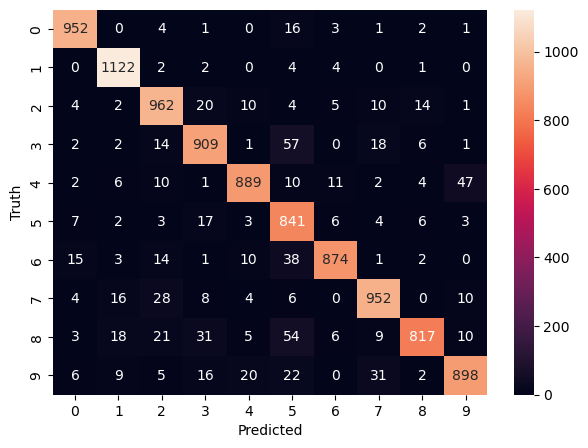

In [110]:
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [111]:
#flatten the data using keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),


])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5


c:\Users\AliRaza\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7701 - loss: 0.8334
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8956 - loss: 0.3634
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9034 - loss: 0.3241
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9052 - loss: 0.3172
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9127 - loss: 0.2888
